<a href="https://colab.research.google.com/github/RAM-Jr/My-Notebooks/blob/main/credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Author: Rui Alberto Munguambe Júnior

## Objectives


In this notebook I'll perform the following tasks:
* Basic data preprocessing;
* Model a classification task using the Scikit-Learn;
* Train a Logistic Regression, Suppport Vector Machine and Decision Tree models using Scikit-Learn; and
* Evaluate the quality of the trained models.


## Table of Contents


1. About the Dataset
2. Download the Dataset
3. Import Libraries
4. Exploratory Data Analysis
5. Dataset Preprocessing
6. Correlation Analysis
7. Split the data into train and test
8. Build a Logistic Regression model
9. Evaluate the Logistic Regression model
10. Build a Decision Tree Classifier
11. Evaluate the Decision Tree Classifiers
12. Build a Support Vector Machine model
13. Evaluate the Support Vector Machine Model
14. Comments

# About Dataset

<div id="about_dataset">
  <h2>Link:</h2>
  <li><a href='https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud'>https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud</a></li>

  <h2>Context</h2>
  <p></p>
  It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

  <h2>Content</h2>
  <p>The dataset contains transactions made by credit cards in September 2013 by European cardholders.</br>
  This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.</p>


  <p>It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. </br>Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.</p>

  <p>Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.
  </p>
</div>

# Download the Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# !pip install opendatasets

# import opendatasets as od
# od.download("https://www.kaggle.com/mlg-ulb/creditcardfraud")

In [3]:
# !mv /content/creditcardfraud/creditcard.csv '/content/drive/MyDrive/Colab Notebooks/fraud_detection'

<div id="import_libraries">
    <h2>Import Libraries</h2>
</div>


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import roc_auc_score, precision_recall_curve
import time
import warnings
warnings.filterwarnings('ignore')

<div id="exploratory_data_analysis">
    <h2>Exploratory Data Analysis</h2>
</div>


In this section I will read the dataset in a Pandas dataframe, visualize its content and display the data statistics.

In [5]:
# read the data
raw_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fraud_detection/creditcard.csv')
print("There are " + str(len(raw_data)) + " observations in the credit card fraud dataset.")
print("There are " + str(len(raw_data.columns)) + " variables in the dataset.")

# display the first 5 rows in the dataset
raw_data.head()

There are 284807 observations in the credit card fraud dataset.
There are 31 variables in the dataset.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
# display the descriptive
raw_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Each row in the dataset represents a credit card transaction and there are 31 features, including the target feature *class*. 
I will train different models that use the other features to predict the value of the Class feature, that is, to predict whether the transaction is fraudulent or not.

Note: For confidentiality reasons, the original names of most features are anonymized V1, V2 .. V28. The values of these features are the result of a PCA transformation and are numerical. The feature 'Class' is the target variable and it takes two values: 1 in case of fraud and 0 otherwise. For more information about the dataset read the description in the section *About the Dataset*


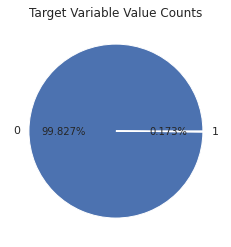

In [7]:
# get the set of distinct classes
labels = raw_data.Class.unique()

# get the count of each class
sizes = raw_data.Class.value_counts().values

# plot the class value counts
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.3f%%')
ax.set_title('Target Variable Value Counts')
plt.show()

As shown above, the Class variable has two values: 0 (the credit card transaction is legitimate) and 1 (the credit card transaction is fraudulent). 
As it can be seen, the dataset is highly unbalanced, which means that the target variable classes are not represented equally. This case requires special attention when training or when evaluating the quality of a model. One way of handing this case at train time is to bias the model to pay more attention to the samples in the minority class. The models under the current study will be configured to take into account the class weights of the samples at train time.


### Plot the Data

In [8]:
raw_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


From the descriptive statistics I can see that for the feature *Amount*, most of the transactions have a low amount but the maximum value obtained is very high compared to the most frequent transactions. This situation is normal in the real world since except a few entities, most of them make transaction of very low amount.

In [9]:
# display the minimum and maximum amount
print(f'Amount range: [{raw_data.Amount.min()} , {raw_data.Amount.max()}]')

# display the 90th Percentile
print(f'90th Percentile: {raw_data.Amount.quantile(q=0.9)}')

Amount range: [0.0 , 25691.16]
90th Percentile: 203.0


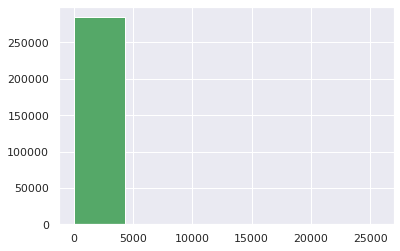

Minimum amount value is  0.0
Maximum amount value is  25691.16
90% of the transactions have an amount less or equal than  203.0


In [10]:
plt.hist(raw_data.Amount.values, 6, histtype='bar', facecolor='g')
plt.show()

print("Minimum amount value is ", np.min(raw_data.Amount.values))
print("Maximum amount value is ", np.max(raw_data.Amount.values))
print("90% of the transactions have an amount less or equal than ", np.percentile(raw_data.Amount.values, 90))

<div id="dataset_preprocessing">
    <h2>Dataset Preprocessing</h2>
</div>


In this subsection you will prepare the data for training. 


#### Verify if there are duplicates samples and missing values

In [11]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28


For all features the column *Non-Null Count* have the same value which means that there are no missing values.

In [12]:
raw_data.duplicated().sum() 

1081

There are 1081 duplicated samples

In [13]:
raw_data.shape

(284807, 31)

In [14]:
# remove all duplicates and keep the last occurrence
raw_data = raw_data.drop_duplicates(keep='last')

In [15]:
raw_data.shape

(283726, 31)

# Correlation Analysis

<Axes: >

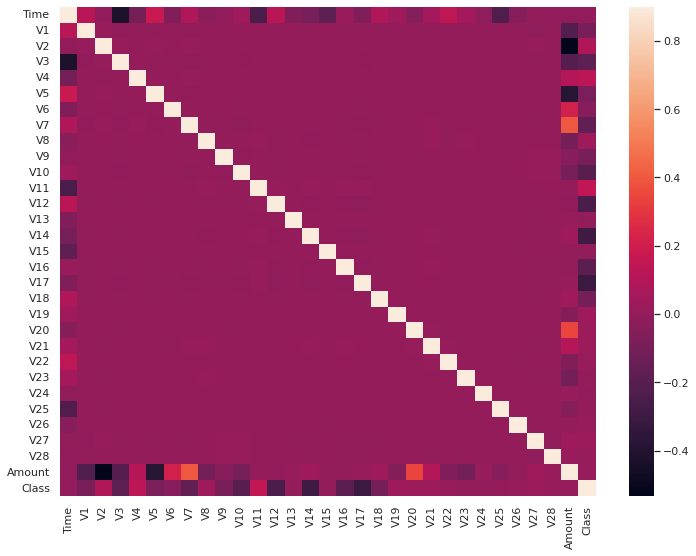

In [16]:
corrmat = raw_data.corr()
plt.figure(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9)

In [17]:
corr_degrees = corrmat['Class'].sort_values(ascending=False)
corr_degrees = pd.DataFrame({'Correlation Degree' :corr_degrees})

# the following line returns the correlation degrees for features with a degree higher than 0.05 or less than -0.05
corr_degrees = corr_degrees[~corr_degrees['Correlation Degree'].between(-0.05,0.05)]
corr_degrees

,Correlation Degree
Class,1.000000
V11,0.149067
V4,0.129326
V2,0.084624
V5,-0.087812
V9,-0.094021
V1,-0.094486
V18,-0.105340
V7,-0.172347
V3,-0.182322


From the correlation analysis, it can be seen that all the features have a good degree of correlation with the target feature

### Normalize the Data

In [18]:
# standardize features by removing the mean and scaling to unit variance
# I will standardize all features except the target feature
raw_data.iloc[:, 0:30] = StandardScaler().fit_transform(raw_data.iloc[:, 0:30])
data_matrix = raw_data.values

# inputs: for the input features
inputs = data_matrix[:, 0:30]

# targets: for the target feature
targets = data_matrix[:, 30]

# data normalization with l1 norm
inputs = normalize(inputs, norm="l1")

# print the shape of the features matrix and the labels vector
print('inputs.shape=', inputs.shape, 'targets.shape=', targets.shape)

inputs.shape= (283726, 30) targets.shape= (283726,)


# Split the data into train and test data

Now that the dataset is ready to build the classification models, I'll split the pre-processed data into a subset to be used for training the model (the train set) and a subset to be used for evaluating the quality of the model (the test set).


In [19]:
# I'll use 30% of the data for test
# I'll set the parameter stratify for the targets to split the data into train and test sets in a way 
# that preserves the same proportions of examples in each class.
x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.3, random_state=42, stratify=targets)       
print('X_train.shape=', x_train.shape, 'Y_train.shape=', y_train.shape)
print('X_test.shape=', x_test.shape, 'Y_test.shape=', y_test.shape)

X_train.shape= (198608, 30) Y_train.shape= (198608,)
X_test.shape= (85118, 30) Y_test.shape= (85118,)


# Build a Logistic Regression model

In [20]:
# compute the sample weights to be used as input to the train routine so that 
# it takes into account the class imbalance present in this dataset
w_train = compute_sample_weight('balanced', y_train)

In [21]:
from sklearn.linear_model import LogisticRegression

# Create the model, and for reproducible output across multiple function calls, set random_state to a given integer value
logistic_reg_model = LogisticRegression(random_state=35)

t0 = time.time()

# train the model
logistic_reg_model.fit(x_train,y_train,sample_weight=w_train)

# Calculate the time to train the model
sklearn_time = time.time() - t0

# Evaluate the Logistic Regression model

In [22]:
# Compute the probabilities of the test samples to belong to the class of fraudulent transactions
logistic_reg_model_pred = logistic_reg_model.predict_proba(x_test)[:,1]

# evaluate the Compute Area Under the Receiver Operating Characteristic 
# Curve (ROC-AUC) score from the predictions
logistic_reg_model_roc_auc = roc_auc_score(y_test, logistic_reg_model_pred)
print("Training time (s):  {0:.2f}".format(sklearn_time))
print('Training score : {0:.3f}'.format(logistic_reg_model.score(x_train,y_train)))
print('ROC-AUC score : {0:.3f}'.format(logistic_reg_model_roc_auc))

Training time (s):  3.45
Training score : 0.968
ROC-AUC score : 0.970


A very good result with and the model doesn't overfit the data. The training time was short, which is good

# Build a Decision Tree Classifier model

In [23]:
# import the Decision Tree Classifier Model from scikit-learn
from sklearn.tree import DecisionTreeClassifier

# for reproducible output across multiple function calls, set random_state to a given integer value
decision_tree_model = DecisionTreeClassifier(max_depth=4, random_state=35)

t0 = time.time()
# train a Decision Tree Classifier
decision_tree_model.fit(x_train, y_train, sample_weight=w_train)

# Calculate the time to train the model
sklearn_time = time.time() - t0

# Evaluate the Decision Tree model


In [24]:
# Compute the probabilities of the test samples to belong to the class of fraudulent transactions
decision_tree_pred = decision_tree_model.predict_proba(x_test)[:,1]

# evaluate the Compute Area Under the Receiver Operating Characteristic 
# Curve (ROC-AUC) score from the predictions
decision_tree_roc_auc = roc_auc_score(y_test, decision_tree_pred)
print("Training time (s):  {0:.2f}".format(sklearn_time))
print('Training score : {0:.3f}'.format(decision_tree_model.score(x_train,y_train)))
print('ROC-AUC score : {0:.3f}'.format(decision_tree_roc_auc))

Training time (s):  5.04
Training score : 0.981
ROC-AUC score : 0.886


The Training score for the decision tree model is very good, while the test score is good yet it's very low compared to the train score, which means that the model may have overfit data. The training time is longer than the Logistic Regression model, it was 2 times more than the time used to train the logistic regression model.

# Build a Support Vector Machine model

This model was not shown during the lectures, but I have learned about it from other courses and I would like to see how this model will perform compared to the others

In [25]:
# import the linear Support Vector Machine (SVM) model from Scikit-Learn
from sklearn.svm import LinearSVC

# instatiate a scikit-learn SVM model
# to indicate the class imbalance at fit time, set class_weight='balanced'
# for reproducible output across multiple function calls, set random_state to a given integer value
svm_model = LinearSVC(class_weight='balanced', random_state=31, loss="hinge")

# train a linear Support Vector Machine model using Scikit-Learn
t0 = time.time()
svm_model.fit(x_train, y_train)
sklearn_time = time.time() - t0

# Evaluate the SVM model

In [26]:
# Compute the probabilities of the test samples
svm_model_pred = svm_model.decision_function(x_test)

svm_model_roc_auc = roc_auc_score(y_test, svm_model_pred)
print("Training time (s):  {0:.2f}".format(sklearn_time))
print('Training score : {0:.3f}'.format(svm_model.score(x_train,y_train)))
print('ROC-AUC score : {0:.3f}'.format(svm_model_roc_auc))

Training time (s):  12.77
Training score : 0.972
ROC-AUC score : 0.975


The result is a little better than the one obtained from the logistic regression model, the only shortcomming is that the training time was almost 6 times longer than the one used to train the logistic model. 

# Comments

Among the 3 models, I would choose the Logistic Regression model which has a good perfomance and was the quickest to train.
Of course if the criterion for the choice is only the score, I would choose the SVM model.

I can't be completely sure if the logistic and svm models didn't really overfit because I didn't create and use a validation set to verify.

## Author


Rui Alberto Munguambe Júnior

## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2023-03-19  | 0.2  | RAM_Jr  |  ICT4Dev Project |
